In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
img_input = keras.layers.Input(shape=(224, 224, 3)) # defining the Input shape
Encoder_Dense = DenseNet121( weights = 'imagenet',include_top = False,input_tensor=img_input) 
model=Encoder_Dense
model.summary()

29089792/29084464 [==============================] - 1s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
_______________________

In [0]:
Encoder = keras.layers.SeparableConv2D(filters = 1024,kernel_size = (3, 3),activation = 'relu',kernel_initializer='he_normal',padding="same")(Encoder_Dense.output)
Encoder = keras.layers.BatchNormalization()(Encoder)
print(Encoder.shape)

(None, 7, 7, 1024)


In [0]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_1
1 zero_padding2d
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_1
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu
47 conv2_block6_

In [0]:
Layer1=Encoder_Dense.get_layer(name="pool3_pool").output
print(Layer1.shape)
Layer2=Encoder_Dense.get_layer(name="pool2_pool").output
print(Layer2.shape)
Layer3=Encoder_Dense.get_layer(name="pool1").output
print(Layer3.shape)
Layer4=Encoder_Dense.get_layer(name="conv1/bn").output
print(Layer4.shape)

(None, 14, 14, 256)
(None, 28, 28, 128)
(None, 56, 56, 64)
(None, 112, 112, 64)


In [0]:
from tensorflow.keras.applications import Xception
img_input = keras.layers.Input(shape=(224, 224, 3)) # defining the Input shape
Encoder_Xception = Xception( weights = 'imagenet',include_top = False,input_tensor=img_input) 
model=Encoder_Xception
#model.summary()

83689472/83683744 [==============================] - 1s 0us/step


In [0]:
conv4 = Encoder_Xception.layers[121].output
print(conv4)
print(conv4.shape)
conv3 = Encoder_Xception.layers[31].output
print(conv3)
print(conv3.shape)
conv2 = Encoder_Xception.layers[21].output
print(conv2)
print(conv2.shape)
conv1 = Encoder_Xception.layers[11].output
print(conv1)
print(conv1.shape)

Tensor("block13_sepconv2_bn/Identity:0", shape=(None, 14, 14, 1024), dtype=float32)
(None, 14, 14, 1024)
Tensor("block4_sepconv2_bn/Identity:0", shape=(None, 28, 28, 728), dtype=float32)
(None, 28, 28, 728)
Tensor("block3_sepconv2_bn/Identity:0", shape=(None, 55, 55, 256), dtype=float32)
(None, 55, 55, 256)
Tensor("block2_sepconv2_bn/Identity:0", shape=(None, 109, 109, 128), dtype=float32)
(None, 109, 109, 128)


In [0]:
for i, layer in enumerate(Encoder_Xception.layers):
   print(i, layer.name)

In [0]:
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
img_input = keras.layers.Input(shape=(224, 224, 3)) # defining the Input shape
Encoder_Inception = InceptionV3( weights = 'imagenet',include_top =False,input_tensor=img_input) 
model=Encoder_Inception
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_312 (Conv2D)             (None, 111, 111, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_313 (BatchN (None, 111, 111, 32) 96          conv2d_312[0][0]                 
__________________________________________________________________________________________________
activation_307 (Activation)     (None, 111, 111, 32) 0           batch_normalization_313[0][0]    
_______________________________________________________________________________________

In [0]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_7
1 conv2d_312
2 batch_normalization_313
3 activation_307
4 conv2d_313
5 batch_normalization_314
6 activation_308
7 conv2d_314
8 batch_normalization_315
9 activation_309
10 max_pooling2d_8
11 conv2d_315
12 batch_normalization_316
13 activation_310
14 conv2d_316
15 batch_normalization_317
16 activation_311
17 max_pooling2d_9
18 conv2d_320
19 batch_normalization_321
20 activation_315
21 conv2d_318
22 conv2d_321
23 batch_normalization_319
24 batch_normalization_322
25 activation_313
26 activation_316
27 average_pooling2d_10
28 conv2d_317
29 conv2d_319
30 conv2d_322
31 conv2d_323
32 batch_normalization_318
33 batch_normalization_320
34 batch_normalization_323
35 batch_normalization_324
36 activation_312
37 activation_314
38 activation_317
39 activation_318
40 mixed0
41 conv2d_327
42 batch_normalization_328
43 activation_322
44 conv2d_325
45 conv2d_328
46 batch_normalization_326
47 batch_normalization_329
48 activation_320
49 activation_323
50 average_pooling2d_11
51 conv2d_324
52 c

In [0]:
Encoder = keras.layers.SeparableConv2D(filters = 1024,kernel_size = (3, 3),activation = 'relu',kernel_initializer='he_normal',padding="same")(Encoder_Inception.output)
Encoder = keras.layers.BatchNormalization()(Encoder)
print(Encoder.shape)

(None, 5, 5, 1024)


In [0]:
# residual block may can apply with any number of layers.
def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(blockInput, num_filters=16):
    x = LeakyReLU(alpha=0.1)(blockInput)
    x = BatchNormalization()(x)
    blockInput = BatchNormalization()(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    return x
  

In [0]:
import os
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import numpy as np
from keras import backend as K
from keras.callbacks import ModelCheckpoint, CSVLogger
from keras.layers import MaxPooling2D, UpSampling2D, Convolution2D, Input, merge, concatenate
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from skimage.io import imsave
import keras
from keras import optimizers
##from data import load_train_data, load_test_data
#
K.set_image_data_format('channels_last')  # TF dimension ordering in this code
#
#img_rows = 128
#img_cols = 128
#
smooth = 1.
epochs = 200
optimizerada=optimizers.Adadelta(1.0, rho=0.95)
##optimizernadam=optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
##optimizeradamx=optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
#ptimizeradamxRMS=optimizers.RMSprop(lr=0.001, rho=0.9)

def merge(inputs, mode, concat_axis=-1):
    return concatenate(inputs, concat_axis)

RMSpropoa=optimizers.RMSprop(lr=0.001,rho=0.9)
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)


def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)


def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def f1score(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall))
import numpy as np
import pandas as pd
import gc
import keras

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split

from skimage.transform import resize
import tensorflow as tf
import keras.backend as K
from keras.losses import binary_crossentropy

from keras.preprocessing.image import load_img
from keras import Model
from keras.callbacks import  ModelCheckpoint
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout,BatchNormalization
from keras.layers import Conv2D, Concatenate, MaxPooling2D
from keras.layers import UpSampling2D, Dropout, BatchNormalization
from tqdm import tqdm_notebook
from keras import initializers
from keras import regularizers
from keras import constraints
from keras.utils import conv_utils
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras.engine import InputSpec
from keras import backend as K
from keras.layers import LeakyReLU
from keras.layers import ZeroPadding2D
from keras.losses import binary_crossentropy
import keras.callbacks as callbacks
from keras.callbacks import Callback
from keras.applications.xception import Xception
from keras.layers import multiply


from keras import optimizers
from keras.legacy import interfaces
from keras.utils.generic_utils import get_custom_objects

from keras.engine.topology import Input
from keras.engine.training import Model
from keras.layers.convolutional import Conv2D, UpSampling2D, Conv2DTranspose
from keras.layers.core import Activation, SpatialDropout2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from keras.regularizers import l2
from keras.layers.core import Dense, Lambda
from keras.layers.merge import concatenate, add
from keras.layers import GlobalAveragePooling2D, Reshape, Dense, multiply, Permute
from keras.optimizers import SGD

def convolution_block(x, filters, size, strides=(1,1), padding='same', activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = LeakyReLU(alpha=0.1)(x)
    return x

def residual_block(blockInput, num_filters=16):
    x = LeakyReLU(alpha=0.1)(blockInput)
    x = BatchNormalization()(x)
    blockInput = BatchNormalization()(blockInput)
    x = convolution_block(x, num_filters, (3,3) )
    x = convolution_block(x, num_filters, (3,3), activation=False)
    x = Add()([x, blockInput])
    return x

def attention_up_and_concate1(down_layer, layer):
    # up = Conv2DTranspose(out_channel, [2, 2], strides=[2, 2])(down_layer)
    up = UpSampling2D(size=(2, 2))(down_layer)

    layer = attention_block_2d1(x=layer, g=up, inter_channel=in_channel // 4)
    my_concat = Lambda(lambda x: K.concatenate([x[0], x[1]], axis=3))
    concate = my_concat([up, layer])
    return concate


def attention_block_2d1(x, g, inter_channel):
    # theta_x(?,g_height,g_width,inter_channel)

    theta_x = Conv2D(inter_channel, [1, 1], strides=[1, 1])(x)

    # phi_g(?,g_height,g_width,inter_channel)

    phi_g = Conv2D(inter_channel, [1, 1], strides=[1, 1])(g)

    # f(?,g_height,g_width,inter_channel)

    f = Activation('relu')(add([theta_x, phi_g]))

    # psi_f(?,g_height,g_width,1)

    psi_f = Conv2D(1, [1, 1], strides=[1, 1])(f)

    rate = Activation('sigmoid')(psi_f)

    # rate(?,x_height,x_width)

    # att_x(?,x_height,x_width,x_channel)

    att_x = multiply([x, rate])

    return att_x

in_channel=1024

def UXception(input_shape=(None, None, 3)):

    backbone = Xception(input_shape=input_shape,weights='imagenet',include_top=False)
    input = backbone.input
    start_neurons = 16

    conv4 = backbone.layers[121].output
    conv4 = LeakyReLU(alpha=0.1)(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.1)(pool4)
    
     # Middle
    convm = Conv2D(start_neurons * 32, (3, 3), activation=None, padding="same")(pool4)
    convm = residual_block(convm,start_neurons * 32)
    convm = residual_block(convm,start_neurons * 32)
    convm = LeakyReLU(alpha=0.1)(convm)
    
    # 10 -> 20
    #deconv4 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)
    #uconv4 = concatenate([deconv4, conv4])
    uconv4=attention_up_and_concate1(convm, conv4)
    uconv4 = Dropout(0.1)(uconv4)
    
    uconv4 = Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(uconv4)
    uconv4 = residual_block(uconv4,start_neurons * 16)
    uconv4 = residual_block(uconv4,start_neurons * 16)
    uconv4 = LeakyReLU(alpha=0.1)(uconv4)
    
    # 10 -> 20
    #deconv3 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv4)
    conv3 = backbone.layers[31].output
    #uconv3 = concatenate([deconv3, conv3])  
    uconv3=attention_up_and_concate1(uconv4, conv3)
    uconv3 = Dropout(0.1)(uconv3)
    
    uconv3 = Conv2D(start_neurons * 8, (3, 3), activation=None, padding="same")(uconv3)
    uconv3 = residual_block(uconv3,start_neurons * 8)
    uconv3 = residual_block(uconv3,start_neurons * 8)
    uconv3 = LeakyReLU(alpha=0.1)(uconv3)

    # 20 -> 40
    #deconv2 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv3)
    conv2 = backbone.layers[21].output
    conv2 = ZeroPadding2D(((1,0),(1,0)))(conv2)
    uconv2=attention_up_and_concate1(uconv3, conv2)
    #uconv2 = concatenate([deconv2, conv2])
        
    uconv2 = Dropout(0.1)(uconv2)
    uconv2 = Conv2D(start_neurons * 4, (3, 3), activation=None, padding="same")(uconv2)
    uconv2 = residual_block(uconv2,start_neurons * 4)
    uconv2 = residual_block(uconv2,start_neurons * 4)
    uconv2 = LeakyReLU(alpha=0.1)(uconv2)
    
    # 40 -> 80
    #deconv1 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv2)
    conv1 = backbone.layers[11].output
    conv1 = ZeroPadding2D(((3,0),(3,0)))(conv1)
    #uconv1 = concatenate([deconv1, conv1])
    uconv1=attention_up_and_concate1(uconv2, conv1)
    
    uconv1 = Dropout(0.1)(uconv1)
    uconv1 = Conv2D(start_neurons * 2, (3, 3), activation=None, padding="same")(uconv1)
    uconv1 = residual_block(uconv1,start_neurons * 2)
    uconv1 = residual_block(uconv1,start_neurons * 2)
    uconv1 = LeakyReLU(alpha=0.1)(uconv1)
    
    
    # 80 -> 160
    uconv0 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv1)   
    uconv0 = Dropout(0.1)(uconv0)
    uconv0 = Conv2D(start_neurons * 1, (3, 3), activation=None, padding="same")(uconv0)
    uconv0 = residual_block(uconv0,start_neurons * 1)
    uconv0 = residual_block(uconv0,start_neurons * 1)
    uconv0 = LeakyReLU(alpha=0.1)(uconv0)
    
    uconv0 = Dropout(0.1/2)(uconv0)
    output_layer = Conv2D(1, (1,1), padding="same", activation="sigmoid")(uconv0)    
    
    model = Model(input, output_layer)
    model.name = 'u-xception'

    return model

img_size_target=128
model = UXception(input_shape=(img_size_target,img_size_target,3))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


83689472/83683744 [==============================] - 7s 0us/step


In [0]:
img_size_target=128
input_shape=(img_size_target,img_size_target,3)
backbone = Xception(input_shape=input_shape,weights='imagenet',include_top=False)
input = backbone.input
start_neurons = 16
conv4 = backbone.layers[121].output
conv4 = LeakyReLU(alpha=0.1)(conv4)
pool4 = MaxPooling2D((2, 2))(conv4)
pool4 = Dropout(0.1)(pool4)
print(pool4.shape)

(None, 4, 4, 1024)


In [0]:
# 10 -> 20
#deconv4 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), padding="same")(convm)
#uconv4 = concatenate([deconv4, conv4])
uconv4=attention_up_and_concate1(convm, conv4)
print(conv4.shape)
print(convm.shape)
uconv4 = Dropout(0.1)(uconv4)
print(uconv4.shape)

(None, 8, 8, 1024)
(None, 4, 4, 512)
(None, 8, 8, 1536)


In [0]:
uconv4 = Conv2D(start_neurons * 16, (3, 3), activation=None, padding="same")(uconv4)
uconv4 = residual_block(uconv4,start_neurons * 16)
uconv4 = residual_block(uconv4,start_neurons * 16)
uconv4 = LeakyReLU(alpha=0.1)(uconv4)
print(uconv4.shape)

(None, 8, 8, 256)


In [0]:
#deconv3 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(uconv4)
conv3 = backbone.layers[31].output
print(conv3.shape)
print(uconv4.shape)
#uconv3 = concatenate([deconv3, conv3])  
uconv3=attention_up_and_concate1(uconv4, conv3)
uconv3 = Dropout(0.1)(uconv3)
print(uconv3.shape)

(None, 16, 16, 728)
(None, 8, 8, 256)
(None, 16, 16, 984)


In [0]:
 # Middle
convm = Conv2D(start_neurons * 32, (3, 3), activation=None, padding="same")(pool4)
print(convm.shape)
convm = residual_block(convm,start_neurons * 32)
convm = residual_block(convm,start_neurons * 32)
convm = LeakyReLU(alpha=0.1)(convm)
print(convm.shape)

(None, 4, 4, 512)
(None, 4, 4, 512)


In [0]:
model.summary()

Model: "u-xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 63, 63, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 63, 63, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 63, 63, 32)   0           block1_conv1_bn[0][0]            
_________________________________________________________________________________________

In [0]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.losses import *
from keras import backend as keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.densenet import DenseNet201, DenseNet121
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator


#------------------------------Others python Packages---------------------------
import numpy as np # High-level mathematical functions for n-dimensional arrays 
import os   
import cv2
import skimage.io as io
import skimage.transform as trans
import numpy as np
import glob
from PIL import Image
import skimage
from keras.initializers import Constant
from matplotlib import pyplot as plt
#%matplotlib inline
from skimage.morphology import disk
from sklearn.metrics import confusion_matrix
from skimage.measure import label, regionprops
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import jaccard_similarity_score

###################3Designing of Proposed DSNet#######################################
def DSNet(nClasses, input_height, input_width):

    #------------------------------Define Input Shape----------------------------------
    
    img_input = Input(shape=(input_height, input_width, 3)) # defining the Input shape 
    
    #Load DenseNet121 from keras. This model is initialized with the ImageNet. 
    #This part is responsible for the feature extraction which is so called convolution
    # part of the semantic segmentation (Encoder). 
    
    Encoder_Dense = DenseNet121( weights = 'imagenet',
						include_top = False,
						input_tensor = img_input) 

    Encoder = SeparableConv2D(filters = 1024,
					kernel_size = (3, 3),
					activation = 'relu',
					kernel_initializer='he_normal',
					padding="same")(Encoder_Dense.output)
    Encoder = BatchNormalization()(Encoder)

    
    # Decoding the encoded features to reconstruct the original input shape Image.

    Decoder = UpSampling2D(size = (2, 2))(Encoder)
    Decoder = concatenate([Encoder_Dense.get_layer(name="pool3_pool").output, Decoder], axis=-1)
    Decoder = SeparableConv2D(filters = 1024,
						kernel_size = (3, 3),
						activation = 'relu',
						kernel_initializer='he_normal',
						padding = "same")(Decoder)
    Decoder = BatchNormalization()(Decoder)
    Decoder = UpSampling2D(size = (2, 2))(Decoder)
    Decoder = concatenate([Encoder_Dense.get_layer(name="pool2_pool").output, Decoder], axis=-1)
    Decoder = SeparableConv2D(filters = 512,
						kernel_size = (3, 3),
						activation = 'relu',
						kernel_initializer='he_normal',
						padding = "same")(Decoder)
    Decoder = BatchNormalization()(Decoder)

    Decoder = UpSampling2D(size = (2, 2))(Decoder)
    Decoder = concatenate([Encoder_Dense.get_layer(name="pool1").output, Decoder], axis=-1)
    Decoder = SeparableConv2D(filters = 256,
						kernel_size = (3, 3),
						activation = 'relu',
						kernel_initializer='he_normal',
						padding = "same")(Decoder)
    Decoder = BatchNormalization()(Decoder)

    Decoder = UpSampling2D( size = (2, 2))(Decoder)
    Decoder = concatenate([Encoder_Dense.get_layer(name="conv1/bn").output, Decoder], axis=-1)
    Decoder = SeparableConv2D(filters = 128,
						kernel_size = (3, 3),
						activation = 'relu',
						kernel_initializer='he_normal',
						padding = "same")(Decoder)
    Decoder = BatchNormalization()(Decoder)

    Decoder = UpSampling2D(size = (2, 2))(Decoder)    
    Decoder = SeparableConv2D(filters = 64,
						kernel_size = (3, 3),
						activation = 'relu',
						kernel_initializer='he_normal',
						padding = "same")(Decoder)
    Decoder = BatchNormalization()(Decoder)

    Decoder = SeparableConv2D(filters = nClasses,
						kernel_size = (1, 1),
						activation = 'relu',
						kernel_initializer='he_normal',
						padding = "same")(Decoder)
    Decoder = BatchNormalization()(Decoder)
    

    Predicted_Mask = Conv2D(filters = 1,
									kernel_size = 1,
									activation = 'sigmoid')(Decoder)
    
    
    DSNet_model = Model(input = img_input, output = Predicted_Mask)

    return DSNet_model

model=DSNet(1, 256, 256)
#model.summary()

29089792/29084464 [==============================] - 4s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:113: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [0]:
input_height=256
input_width=256
img_input = Input(shape=(input_height, input_width, 3)) # defining the Input shape 
#Load DenseNet121 from keras. This model is initialized with the ImageNet. 
#This part is responsible for the feature extraction which is so called convolution
# part of the semantic segmentation (Encoder). 
Encoder_Dense = DenseNet121( weights = 'imagenet',include_top = False,input_tensor = img_input) 
Encoder = SeparableConv2D(filters = 1024,kernel_size = (3, 3),activation = 'relu',kernel_initializer='he_normal',padding="same")(Encoder_Dense.output)
Encoder = BatchNormalization()(Encoder)
print(Encoder.shape)


(None, 8, 8, 1024)


In [0]:
# Decoding the encoded features to reconstruct the original input shape Image.
Decoder = UpSampling2D(size = (2, 2))(Encoder)
print(Decoder.shape)
print(Encoder_Dense.get_layer(name="pool3_pool").output.shape)
Decoder = concatenate([Encoder_Dense.get_layer(name="pool3_pool").output, Decoder], axis=-1)
print(Decoder.shape)
Decoder = SeparableConv2D(filters = 1024,kernel_size = (3, 3),activation = 'relu',kernel_initializer='he_normal',padding = "same")(Decoder)
Decoder = BatchNormalization()(Decoder)
print(Decoder.shape)

(None, 16, 16, 1024)
(None, 16, 16, 256)
(None, 16, 16, 1280)
(None, 16, 16, 1024)


In [0]:
Decoder = UpSampling2D(size = (2, 2))(Decoder)
print(Decoder.shape)
print(Encoder_Dense.get_layer(name="pool2_pool").output.shape)
Decoder = concatenate([Encoder_Dense.get_layer(name="pool2_pool").output, Decoder], axis=-1)
print(Decoder.shape)
Decoder = SeparableConv2D(filters = 512,kernel_size = (3, 3),activation = 'relu',kernel_initializer='he_normal',padding = "same")(Decoder)
Decoder = BatchNormalization()(Decoder)
print(Decoder.shape)

(None, 32, 32, 1024)
(None, 32, 32, 128)
(None, 32, 32, 1152)
(None, 32, 32, 512)


In [0]:
Decoder = UpSampling2D(size = (2, 2))(Decoder)
print(Decoder.shape)
print(Encoder_Dense.get_layer(name="pool1").output.shape)
Decoder = concatenate([Encoder_Dense.get_layer(name="pool1").output, Decoder], axis=-1)
print(Decoder.shape)
Decoder = SeparableConv2D(filters = 256,kernel_size = (3, 3),activation = 'relu',kernel_initializer='he_normal',padding = "same")(Decoder)
Decoder = BatchNormalization()(Decoder)
print(Decoder.shape)

(None, 64, 64, 512)
(None, 64, 64, 64)
(None, 64, 64, 576)
(None, 64, 64, 256)


In [0]:
Decoder = UpSampling2D( size = (2, 2))(Decoder)
print(Decoder.shape)
print(Encoder_Dense.get_layer(name="conv1/bn").output.shape)
Decoder = concatenate([Encoder_Dense.get_layer(name="conv1/bn").output, Decoder], axis=-1)
print(Decoder.shape)
Decoder = SeparableConv2D(filters = 128,kernel_size = (3, 3),activation = 'relu',kernel_initializer='he_normal',padding = "same")(Decoder)
Decoder = BatchNormalization()(Decoder)
print(Decoder.shape)

(None, 128, 128, 256)
(None, 128, 128, 64)
(None, 128, 128, 320)
(None, 128, 128, 128)


In [0]:
Decoder = UpSampling2D(size = (2, 2))(Decoder)
print(Decoder.shape)    
Decoder = SeparableConv2D(filters = 64,kernel_size = (3, 3),activation = 'relu',kernel_initializer='he_normal',padding = "same")(Decoder)
Decoder = BatchNormalization()(Decoder)
print(Decoder.shape)  

(None, 256, 256, 128)
(None, 256, 256, 64)


In [0]:
nClasses=3
Decoder = SeparableConv2D(filters = nClasses,kernel_size = (1, 1),activation = 'relu',kernel_initializer='he_normal',padding = "same")(Decoder)
Decoder = BatchNormalization()(Decoder)
print(Decoder.shape)

(None, 256, 256, 3)


In [0]:
Predicted_Mask = Conv2D(filters = 1,kernel_size = 1,activation = 'sigmoid')(Decoder)
print(Predicted_Mask.shape)

(None, 256, 256, 1)


In [0]:
# Inception-ResNetV2 segmentation model

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
import os
import glob
import random

import imgaug
from imgaug import augmenters as iaa
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt


import numpy as np 
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, BatchNormalization, Conv2D, MaxPooling2D,                             						AveragePooling2D, ZeroPadding2D, concatenate, 	
					Concatenate, UpSampling2D, Activation, Lambda)
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard
from tensorflow.keras import metrics


# Inception model
bn_axis = 3
channel_axis = bn_axis
def conv_block(prev, num_filters, kernel=(3, 3), strides=(1, 1), act='relu', prefix=None):
    name = None
    if prefix is not None:
        name = prefix + '_conv'
    conv = Conv2D(num_filters, kernel, padding='same', kernel_initializer='he_normal', strides=strides, name=name)(prev)
    if prefix is not None:
        name = prefix + '_norm'
    conv = BatchNormalization(name=name, axis=bn_axis)(conv)
    if prefix is not None:
        name = prefix + '_act'
    conv = Activation(act, name=name)(conv)
    return conv

def conv2d_bn(x,
              filters,
              kernel_size,
              strides=1,
              padding='same',
              activation='relu',
              use_bias=False,
              name=None):
    """Utility function to apply conv + BN.
    # Arguments
        x: input tensor.
        filters: filters in `Conv2D`.
        kernel_size: kernel size as in `Conv2D`.
        strides: strides in `Conv2D`.
        padding: padding mode in `Conv2D`.
        activation: activation in `Conv2D`.
        use_bias: whether to use a bias in `Conv2D`.
        name: name of the ops; will become `name + '_ac'` for the activation
            and `name + '_bn'` for the batch norm layer.
    # Returns
        Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    x = Conv2D(filters,
              kernel_size,
              strides=strides,
              padding=padding,
              use_bias=use_bias,
              name=name)(x)
    if not use_bias:
            bn_axis = 3
            bn_name = None if name is None else name + '_bn'
            x = BatchNormalization(axis=bn_axis,
                                          scale=False,
                                          name=bn_name)(x)
    if activation is not None:
        ac_name = None if name is None else name + '_ac'
        x = Activation(activation, name=ac_name)(x)
    return x

def inception_resnet_block(x, scale, block_type, block_idx, activation='relu'):
    """Adds a Inception-ResNet block.
    This function builds 3 types of Inception-ResNet blocks mentioned
    in the paper, controlled by the `block_type` argument (which is the
    block name used in the official TF-slim implementation):
        - Inception-ResNet-A: `block_type='block35'`
        - Inception-ResNet-B: `block_type='block17'`
        - Inception-ResNet-C: `block_type='block8'`
    # Arguments
        x: input tensor.
        scale: scaling factor to scale the residuals (i.e., the output of
            passing `x` through an inception module) before adding them
            to the shortcut branch.
            Let `r` be the output from the residual branch,
            the output of this block will be `x + scale * r`.
        block_type: `'block35'`, `'block17'` or `'block8'`, determines
            the network structure in the residual branch.
        block_idx: an `int` used for generating layer names.
            The Inception-ResNet blocks
            are repeated many times in this network.
            We use `block_idx` to identify
            each of the repetitions. For example,
            the first Inception-ResNet-A block
            will have `block_type='block35', block_idx=0`,
            and the layer names will have
            a common prefix `'block35_0'`.
        activation: activation function to use at the end of the block
            (see [activations](../activations.md)).
            When `activation=None`, no activation is applied
            (i.e., "linear" activation: `a(x) = x`).
    # Returns
        Output tensor for the block.
    # Raises
        ValueError: if `block_type` is not one of `'block35'`,
            `'block17'` or `'block8'`.
    """
    if block_type == 'block35':
        branch_0 = conv2d_bn(x, 32, 1)
        branch_1 = conv2d_bn(x, 32, 1)
        branch_1 = conv2d_bn(branch_1, 32, 3)
        branch_2 = conv2d_bn(x, 32, 1)
        branch_2 = conv2d_bn(branch_2, 48, 3)
        branch_2 = conv2d_bn(branch_2, 64, 3)
        branches = [branch_0, branch_1, branch_2]
    elif block_type == 'block17':
        branch_0 = conv2d_bn(x, 192, 1)
        branch_1 = conv2d_bn(x, 128, 1)
        branch_1 = conv2d_bn(branch_1, 160, [1, 7])
        branch_1 = conv2d_bn(branch_1, 192, [7, 1])
        branches = [branch_0, branch_1]
    elif block_type == 'block8':
        branch_0 = conv2d_bn(x, 192, 1)
        branch_1 = conv2d_bn(x, 192, 1)
        branch_1 = conv2d_bn(branch_1, 224, [1, 3])
        branch_1 = conv2d_bn(branch_1, 256, [3, 1])
        branches = [branch_0, branch_1]
    else:
        raise ValueError('Unknown Inception-ResNet block type. '
                         'Expects "block35", "block17" or "block8", '
                         'but got: ' + str(block_type))

    block_name = block_type + '_' + str(block_idx)
    channel_axis = 3
    mixed = Concatenate(
        axis=channel_axis, name=block_name + '_mixed')(branches)
    up = conv2d_bn(mixed,
                   K.int_shape(x)[channel_axis],
                   1,
                   activation=None,
                   use_bias=True,
                   name=block_name + '_conv')

    x = Lambda(lambda inputs, scale: inputs[0] + inputs[1] * scale,
                      output_shape=K.int_shape(x)[1:],
                      arguments={'scale': scale},
                      name=block_name)([x, up])
    if activation is not None:
        x = Activation(activation, name=block_name + '_ac')(x)
    return x


def get_inception_resnet_v2_unet_softmax(input_shape, weights='imagenet'):
    n_channel = 3
    n_class = 4
    img_input = Input(input_shape + (n_channel,))
    
    # Stem block: 35 x 35 x 192
    x = conv2d_bn(img_input, 32, 3, strides=2, padding='same')
    x = conv2d_bn(x, 32, 3, padding='same')
    x = conv2d_bn(x, 64, 3)
    conv1 = x
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    x = conv2d_bn(x, 80, 1, padding='same')
    x = conv2d_bn(x, 192, 3, padding='same')
    conv2 = x
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    # Mixed 5b (Inception-A block): 35 x 35 x 320
    branch_0 = conv2d_bn(x, 96, 1)
    branch_1 = conv2d_bn(x, 48, 1)
    branch_1 = conv2d_bn(branch_1, 64, 5)
    branch_2 = conv2d_bn(x, 64, 1)
    branch_2 = conv2d_bn(branch_2, 96, 3)
    branch_2 = conv2d_bn(branch_2, 96, 3)
    branch_pool = AveragePooling2D(3, strides=1, padding='same')(x)
    branch_pool = conv2d_bn(branch_pool, 64, 1)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    x = Concatenate(axis=channel_axis, name='mixed_5b')(branches)

    # 10x block35 (Inception-ResNet-A block): 35 x 35 x 320
    for block_idx in range(1, 11):
        x = inception_resnet_block(x,
                                   scale=0.17,
                                   block_type='block35',
                                   block_idx=block_idx)
    conv3 = x
    # Mixed 6a (Reduction-A block): 17 x 17 x 1088
    branch_0 = conv2d_bn(x, 384, 3, strides=2, padding='same')
    branch_1 = conv2d_bn(x, 256, 1)
    branch_1 = conv2d_bn(branch_1, 256, 3)
    branch_1 = conv2d_bn(branch_1, 384, 3, strides=2, padding='same')
    branch_pool = MaxPooling2D(3, strides=2, padding='same')(x)
    branches = [branch_0, branch_1, branch_pool]
    x = Concatenate(axis=channel_axis, name='mixed_6a')(branches)

    # 20x block17 (Inception-ResNet-B block): 17 x 17 x 1088
    for block_idx in range(1, 21):
        x = inception_resnet_block(x,
                                   scale=0.1,
                                   block_type='block17',
                                   block_idx=block_idx)
    conv4 = x
    # Mixed 7a (Reduction-B block): 8 x 8 x 2080
    branch_0 = conv2d_bn(x, 256, 1)
    branch_0 = conv2d_bn(branch_0, 384, 3, strides=2, padding='same')
    branch_1 = conv2d_bn(x, 256, 1)
    branch_1 = conv2d_bn(branch_1, 288, 3, strides=2, padding='same')
    branch_2 = conv2d_bn(x, 256, 1)
    branch_2 = conv2d_bn(branch_2, 288, 3)
    branch_2 = conv2d_bn(branch_2, 320, 3, strides=2, padding='same')
    branch_pool = MaxPooling2D(3, strides=2, padding='same')(x)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    x = Concatenate(axis=channel_axis, name='mixed_7a')(branches)

    # 10x block8 (Inception-ResNet-C block): 8 x 8 x 2080
    for block_idx in range(1, 10):
        x = inception_resnet_block(x,
                                   scale=0.2,
                                   block_type='block8',
                                   block_idx=block_idx)
    x = inception_resnet_block(x,
                               scale=1.,
                               activation=None,
                               block_type='block8',
                               block_idx=10)

    # Final convolution block: 8 x 8 x 1536
    x = conv2d_bn(x, 1536, 1, name='conv_7b')
    conv5 = x
    
    conv6 = conv_block(UpSampling2D()(conv5), 320)
    conv6 = concatenate([conv6, conv4], axis=-1)
    conv6 = conv_block(conv6, 320)

    conv7 = conv_block(UpSampling2D()(conv6), 256)
    conv7 = concatenate([conv7, conv3], axis=-1)  
    conv7 = conv_block(conv7, 256)

    conv8 = conv_block(UpSampling2D()(conv7), 128)
    conv8 = concatenate([conv8, conv2], axis=-1)
    conv8 = conv_block(conv8, 128)

    conv9 = conv_block(UpSampling2D()(conv8), 96)
    conv9 = concatenate([conv9, conv1], axis=-1)
    conv9 = conv_block(conv9, 96)

    conv10 = conv_block(UpSampling2D()(conv9), 64)
    conv10 = conv_block(conv10, 64)
    res = Conv2D(n_class, (1, 1), activation='softmax')(conv10)
    
    model = Model(img_input, res)

    return model


In [0]:
n_class=4
model = get_inception_resnet_v2_unet_softmax(input_shape=(256,256), weights=None)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 128, 128, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 128, 128, 32) 96          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation (Activation)         (None, 128, 128, 32) 0           batch_normalization_5[0][0]      
______________________________________________________________________________________________

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 256, 256, 96) 384         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_52 (Conv2D)              (None, 256, 256, 16) 64          input_10[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 256, 256, 3)  0           input_10[0][0]                   
____________________________________________________________________________________________

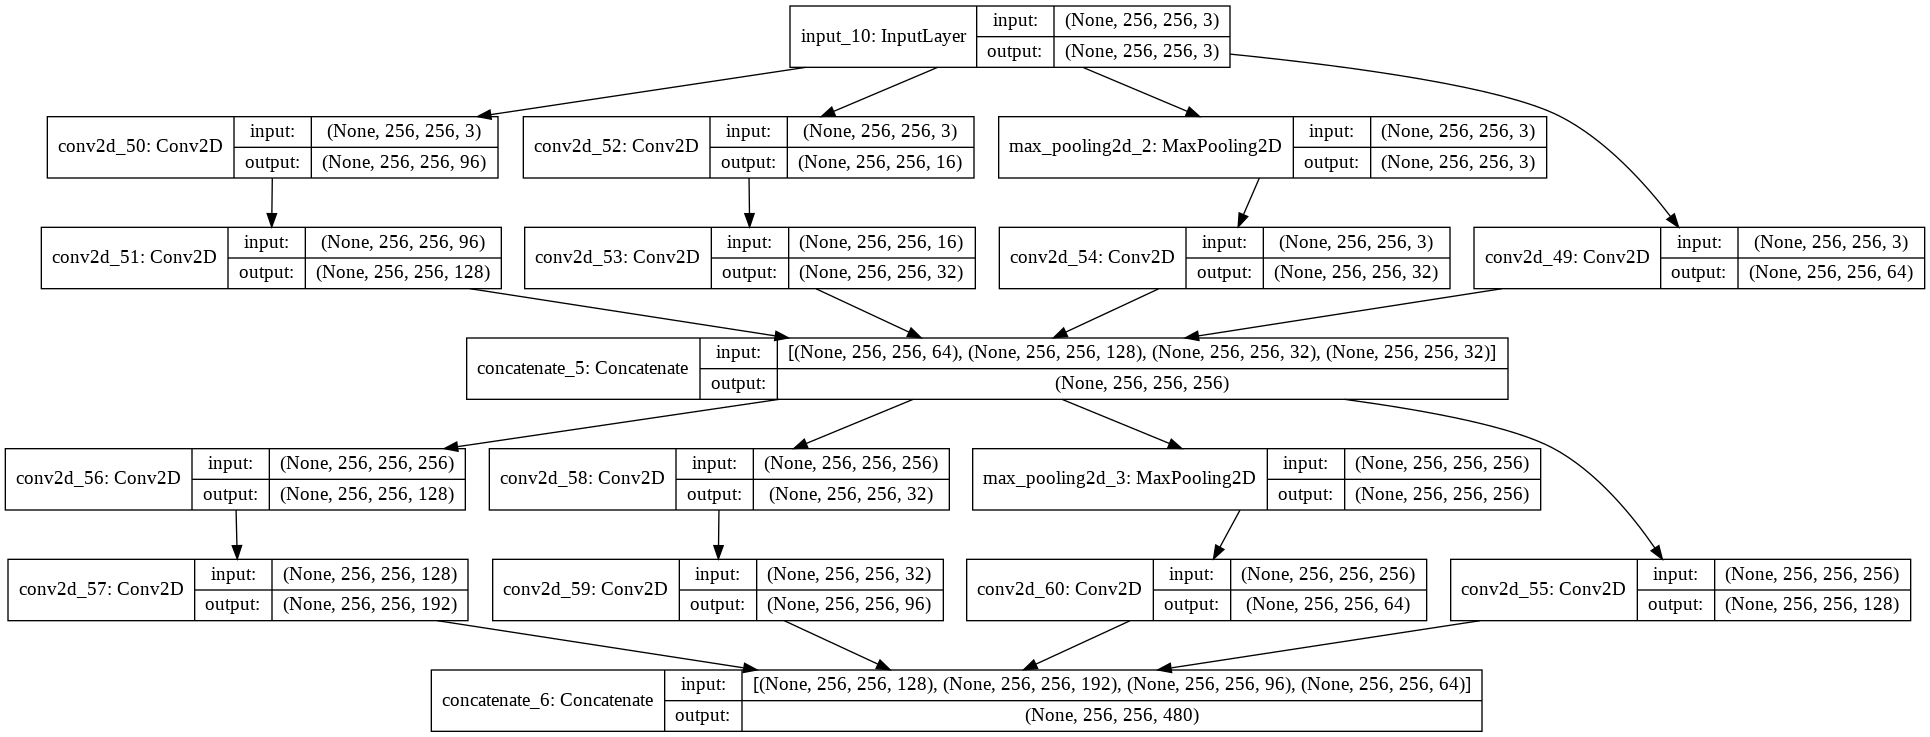

In [0]:
# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.merge import concatenate
from keras.utils import plot_model
 
# function for creating a projected inception module
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
	conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
	# 5x5 conv
	conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
	conv5 = Conv2D(f3_out, (5,5), padding='same', activation='relu')(conv5)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out
 
# define model input
visible = Input(shape=(256, 256, 3))
# add inception block 1
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)
# add inception block 1
layer = inception_module(layer, 128, 128, 192, 32, 96, 64)
# create model
model = Model(inputs=visible, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True, to_file='inception_module.png')

In [0]:
# inception module in keras
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras import models
from keras.models import Model

In [0]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from tensorflow import keras
input_img = keras.layers.Input(shape=(224, 224, 1))

### 1st layer
layer_1 = keras.layers.Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_1 = keras.layers.Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)
print(layer_1.shape)
layer_2 = keras.layers.Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_2 = keras.layers.Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)
print(layer_2.shape)
layer_3 = keras.layers.MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = keras.layers.Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)
print(layer_3.shape)
mid_1 = keras.layers.concatenate([layer_1, layer_2, layer_3], axis = 3)
print(mid_1.shape)

In [0]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [0]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(10, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(10, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)

model = Model(input_layer, [x, x1, x2], name='inception_v1')